<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Helium_Atom" data-toc-modified-id="Helium_Atom-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Helium_Atom</a></span></li></ul></div>

In [1]:
import numpy as np
import time

from ODEAnalysis import *
from n_Body_Simulation import *

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import animation
%matplotlib notebook 

In [2]:
# GoodOnes G=1
# 1D
# [5,-5,1,-1.5], m = [200,1]

# 2D
# [[0,0],[10,0],[0,0],[0,20]], m = [200,4]
# [[0,0],[10,0],[-5,0],[0,0],[0,20],[0,-4]], m = [200,4, 1]

<IPython.core.display.Javascript object>


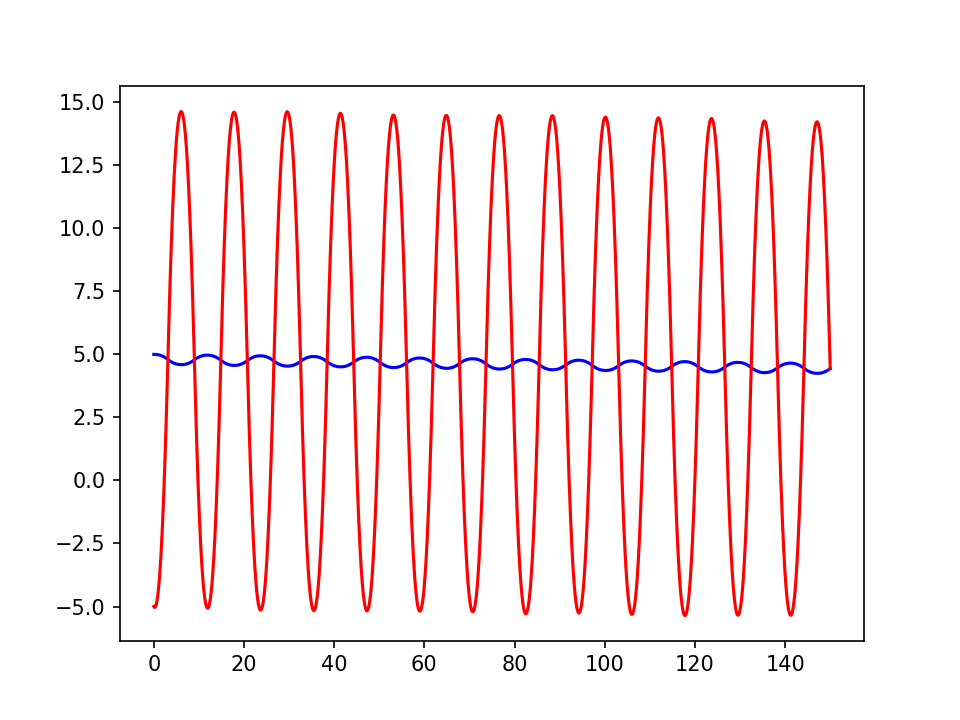

In [3]:
def body_2(t, q1, q2, p1, p2):
    #We have q1,q2,p1,p2 are numpy arrays(vectors) 
    m1 = 200
    m2 = 4
    G = 1
    
    dot_q1 = p1/m1 
    dot_q2 = p2/m2
    dot_p1 = -G*m1*m2*(q1-q2)/(np.linalg.norm(q1-q2)**3)
    dot_p2 = G*m1*m2*(q1-q2)/(np.linalg.norm(q1-q2)**3)
    
    if np.linalg.norm((dot_p1)) > 10:
        dot_p1 = 10*(dot_p1/np.linalg.norm(dot_p1))
        
        
    if np.linalg.norm(dot_p2) > 10:
        dot_p2 = 10*(dot_p2/np.linalg.norm(dot_p2))
 

    
    return np.array([dot_q1,dot_q2,dot_p1,dot_p2])
    
    
ODE = ODEAnalysis(body_2)    
a = ODE.RungeKutta(150,0,[[5],[-5],[1],[-1.5]])

plt.plot(a[0], a[1][:,0], color = 'Blue')
plt.plot(a[0], a[1][:,1], color = 'Red')
plt.show()

<IPython.core.display.Javascript object>


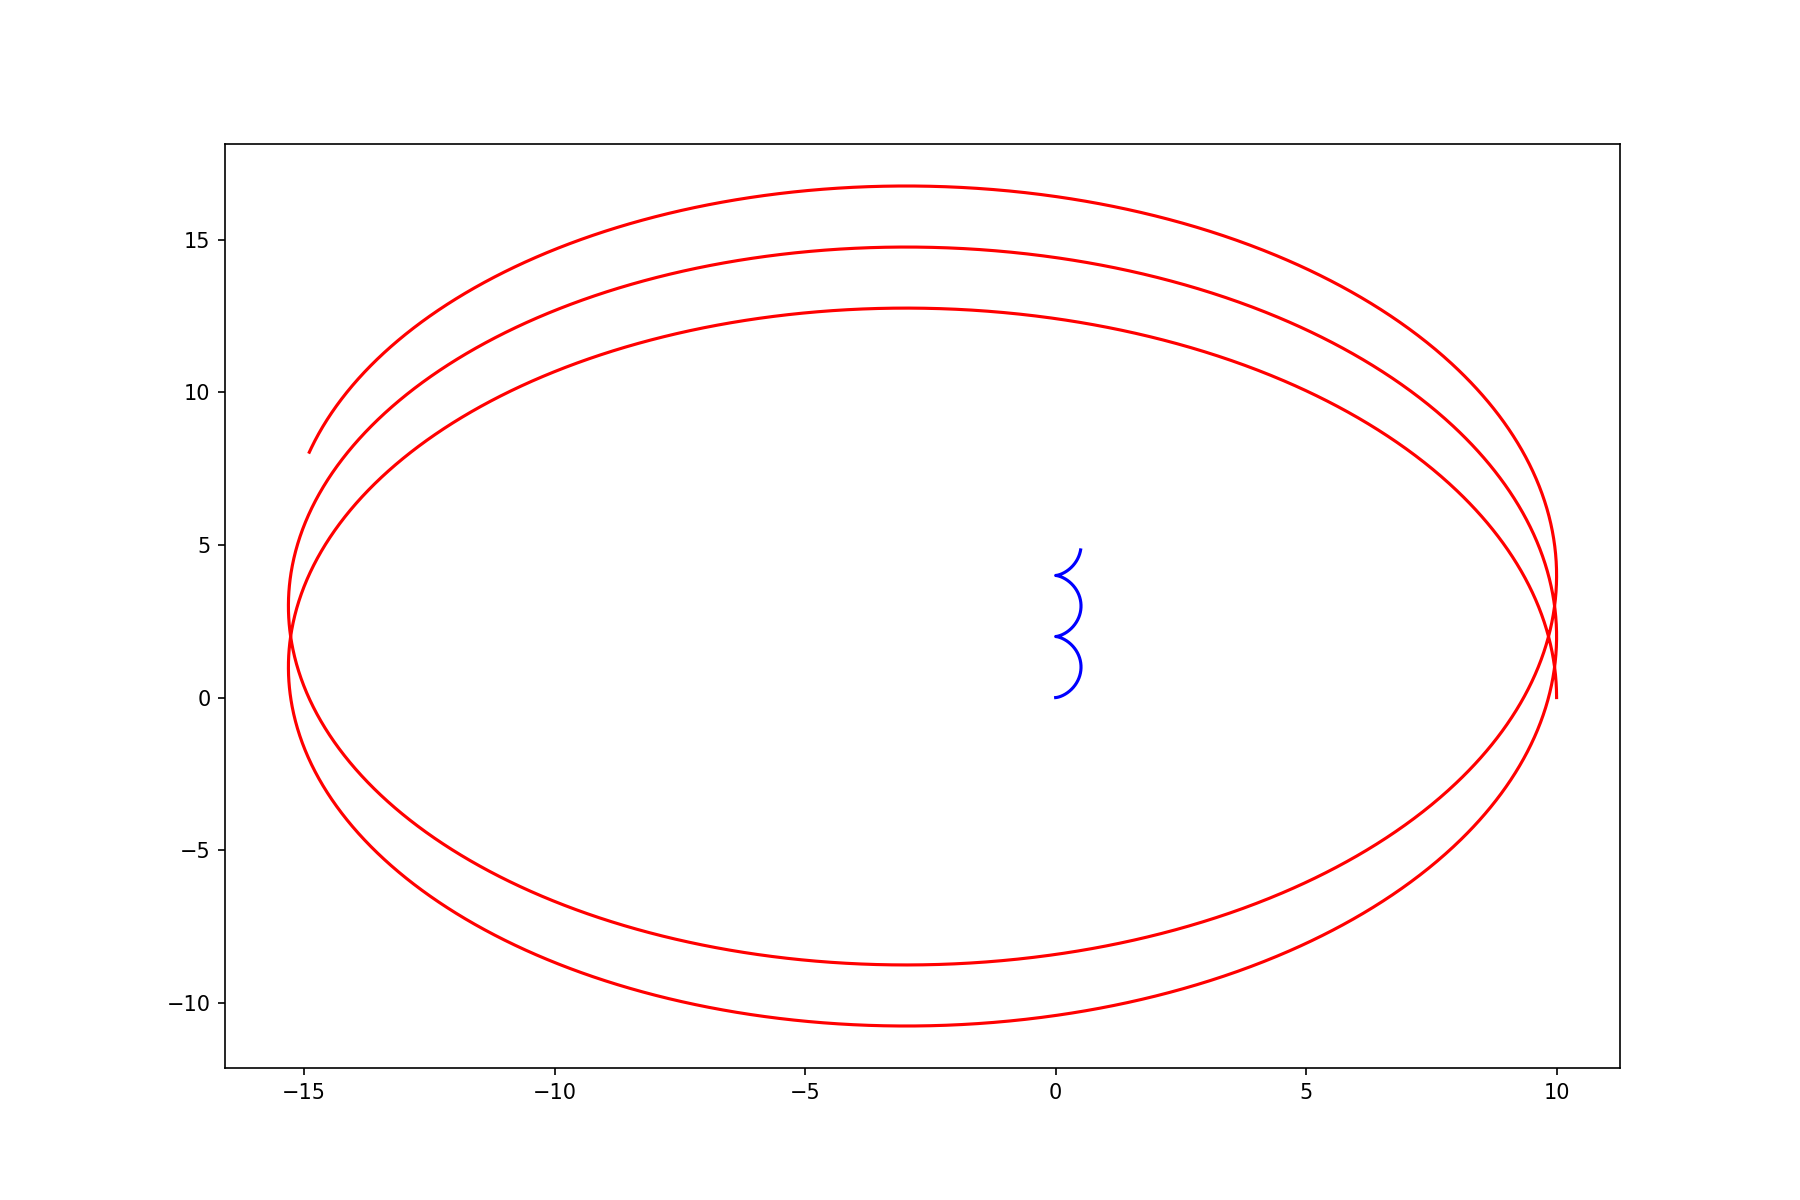

In [4]:
ODE = ODEAnalysis(body_2)    
t, x = ODE.RungeKutta(50,0,[[0,0],[10,0],[0,0],[0,20]])

plt.figure(figsize=(12, 8))
plt.plot(x[:,0,0],x[:,0,1], color = "Blue")
plt.plot(x[:,1,0],x[:,1,1], color = "Red")
plt.show()

<IPython.core.display.Javascript object>


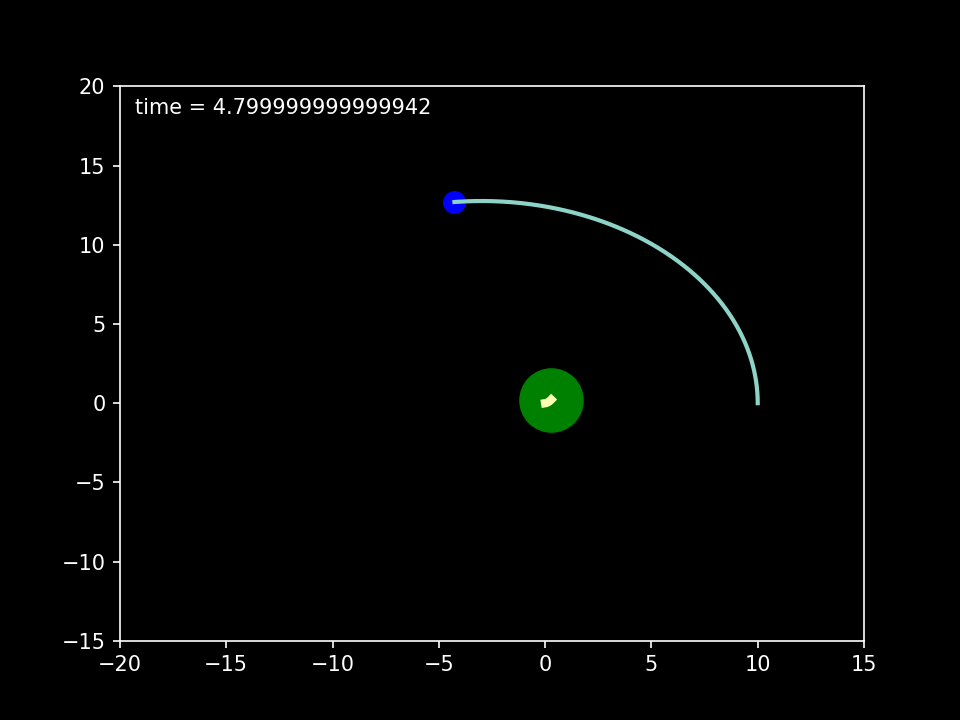

In [5]:
#Does not run on restart and run all so just run this again and it will work
plt.style.use('dark_background')


Earth_x = x[:,0,0]
Earth_y = x[:,0,1]
Moon_x = x[:,1,0]
Moon_y = x[:,1,1]
time = t

Speed = 10
num_of_frames = (len(x[:,0,0])-1)//Speed

fig = plt.figure()
ax = plt.axes(xlim=(-20, 15), ylim=(-15, 20))
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
Earth, = ax.plot([], [],'bo', ms = 30, color = 'Green')
Moon, = ax.plot([], [], 'bo', ms = 10)

Moon_Track, = ax.plot([],[], lw = 2)
Earth_Track, = ax.plot([],[], lw = 4)

def init():
    Earth.set_data([],[])
    Moon.set_data([],[])
    Earth_Track.set_data([],[])
    Moon_Track.set_data([],[])
    
    time_text.set_text('')
    return Earth, Moon, Earth_Track, Moon_Track

def animate(i):
    # i represents the frame number
    pos = i*Speed
    E_trace_len = 3000
    M_trace_len = 500
    
    Earth.set_data(Earth_x[pos], Earth_y[pos])
    Moon.set_data(Moon_x[pos], Moon_y[pos])
    
    Earth_Track.set_data(Earth_x[max(0,pos-E_trace_len):pos], Earth_y[max(0,pos-E_trace_len):pos])
    Moon_Track.set_data(Moon_x[max(0,pos-M_trace_len):pos], Moon_y[max(0,pos-M_trace_len):pos])
    
    time_text.set_text('time = '+str(time[pos]))
    return Earth, Moon, Earth_Track, Moon_Track

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=num_of_frames, interval=40, blit=True, save_count=1500)

#This line takes forever


<IPython.core.display.Javascript object>


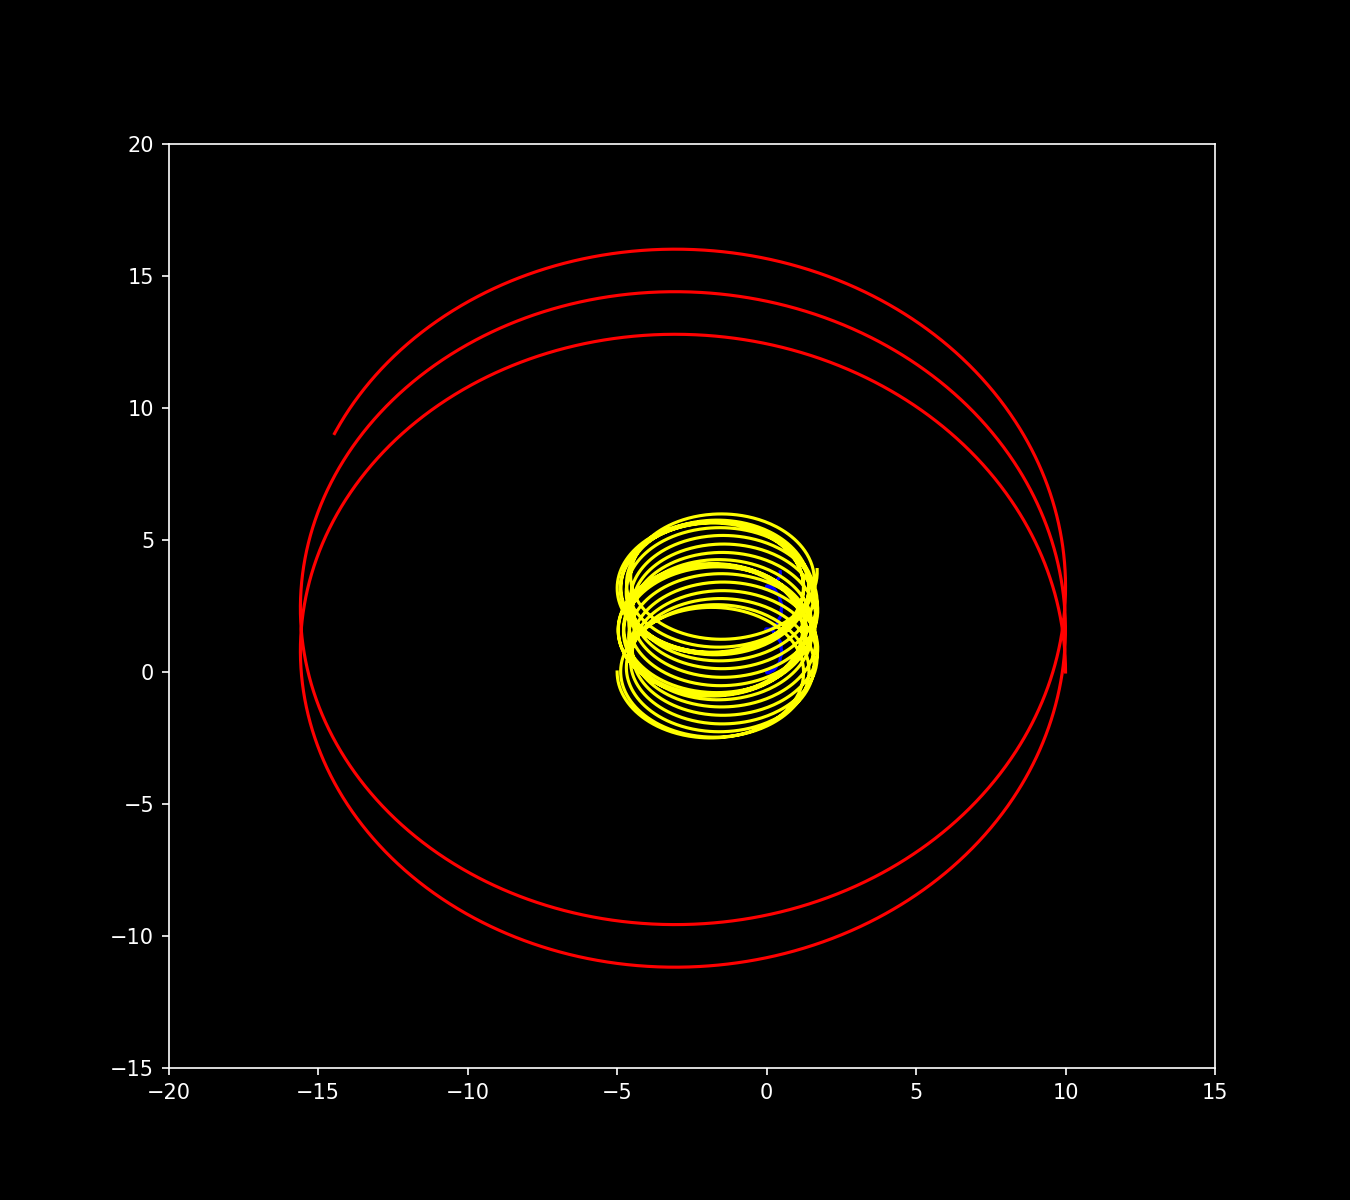

In [6]:
my_class = n_body([200,4,1])
ODE = ODEAnalysis(my_class.grav_n_body)    
t, x = ODE.RungeKutta(50,0,[[0,0],[10,0],[-5,0],[0,0],[0,20],[0,-4]])
plt.figure(figsize=(9, 8))
plt.axes(xlim=(-20, 15), ylim=(-15, 20))
plt.plot(x[:,0,0],x[:,0,1], color = "Blue")
plt.plot(x[:,1,0],x[:,1,1], color = "Red")
plt.plot(x[:,2,0],x[:,2,1], color = "Yellow")
plt.show()

<IPython.core.display.Javascript object>


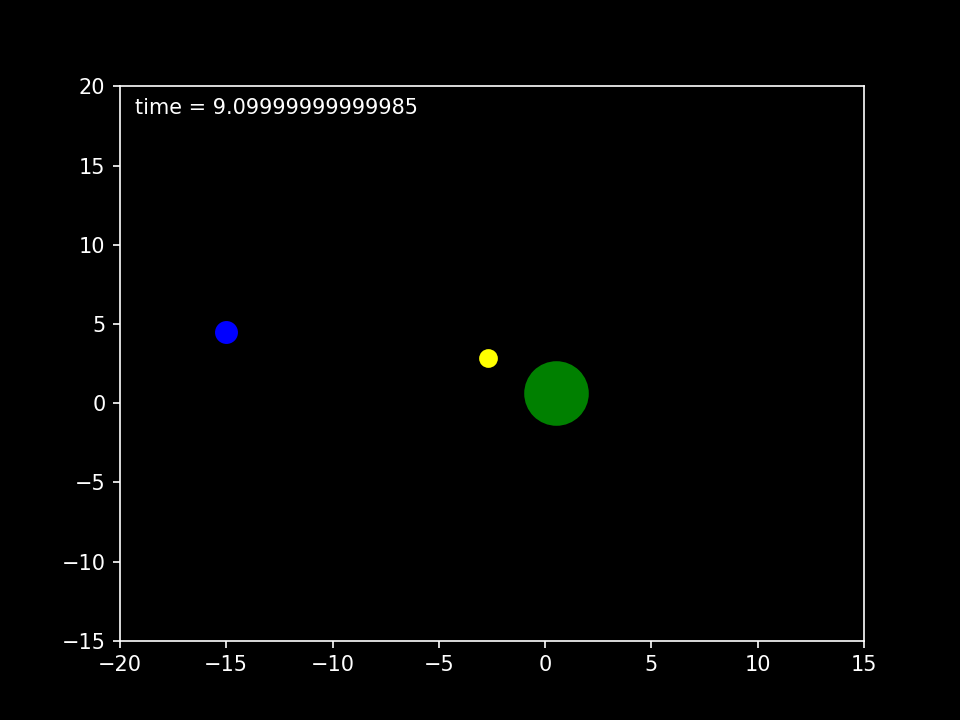

In [7]:
Earth_x = x[:,0,0]
Earth_y = x[:,0,1]
Moon_x = x[:,1,0]
Moon_y = x[:,1,1]
UFO_x = x[:,2,0]
UFO_y = x[:,2,1]
time = t

Speed = 10
num_of_frames = (len(x[:,0,0])-1)//Speed
plt.style.use('dark_background')


fig = plt.figure()
ax = plt.axes(xlim=(-20, 15), ylim=(-15, 20))
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
Earth, = ax.plot([], [],'bo', ms = 30, color = 'Green')
Moon, = ax.plot([], [], 'bo', ms = 10)
UFO, = ax.plot([], [], 'bo', ms = 8, color = "Yellow")

#Moon_Track, = ax.plot([],[], lw = 2)
#Earth_Track, = ax.plot([],[], lw = 4)
#UFO_Track, = ax.plot([],[], lw = 1.5)

def init():
    Earth.set_data([],[])
    Moon.set_data([],[])
    UFO.set_data([],[])
    
    #Earth_Track.set_data([],[])
   # Moon_Track.set_data([],[])
    #UFO_Track.set_data([],[])
    
    time_text.set_text('')
    return Earth, Moon, UFO#, Earth_Track, Moon_Track, UFO_Track

def animate(i):
    # i represents the frame number
    pos = i*Speed
    E_trace_len = 3000
    M_trace_len = 500
    U_trace_len = 100
    
    Earth.set_data(Earth_x[pos], Earth_y[pos])
    Moon.set_data(Moon_x[pos], Moon_y[pos])
    UFO.set_data(UFO_x[pos], UFO_y[pos])
    
    #Earth_Track.set_data(Earth_x[max(0,pos-E_trace_len):pos], Earth_y[max(0,pos-E_trace_len):pos])
    #Moon_Track.set_data(Moon_x[max(0,pos-M_trace_len):pos], Moon_y[max(0,pos-M_trace_len):pos])
    #UFO_Track.set_data(UFO_x[max(0,pos-U_trace_len):pos], UFO_y[max(0,pos-U_trace_len):pos])
    
    time_text.set_text('time = '+str(time[pos]))
    return Earth, Moon, UFO#, Earth_Track, Moon_Track, UFO_Track

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=num_of_frames, interval=40, blit=True, save_count=1500)

In [8]:
my_Sim_System = Simulation(Sim_Name="4_body_orbit")
my_Sim_System.speed = 5
my_Sim_System.AddParts([200, 20, 1, 0.1, 0.1], [[0, 0], [15, 0], [-8, 0], [16.5, 0], [30, 30]],
                       [[0, 0], [5, 80], [0, -2], [0, 0], [-0.1, 0.1]], [1500, 500, 100, 100, 100], [30, 15, 5, 5, 5])
my_Sim_System.CalcPath(65)

<IPython.core.display.Javascript object>


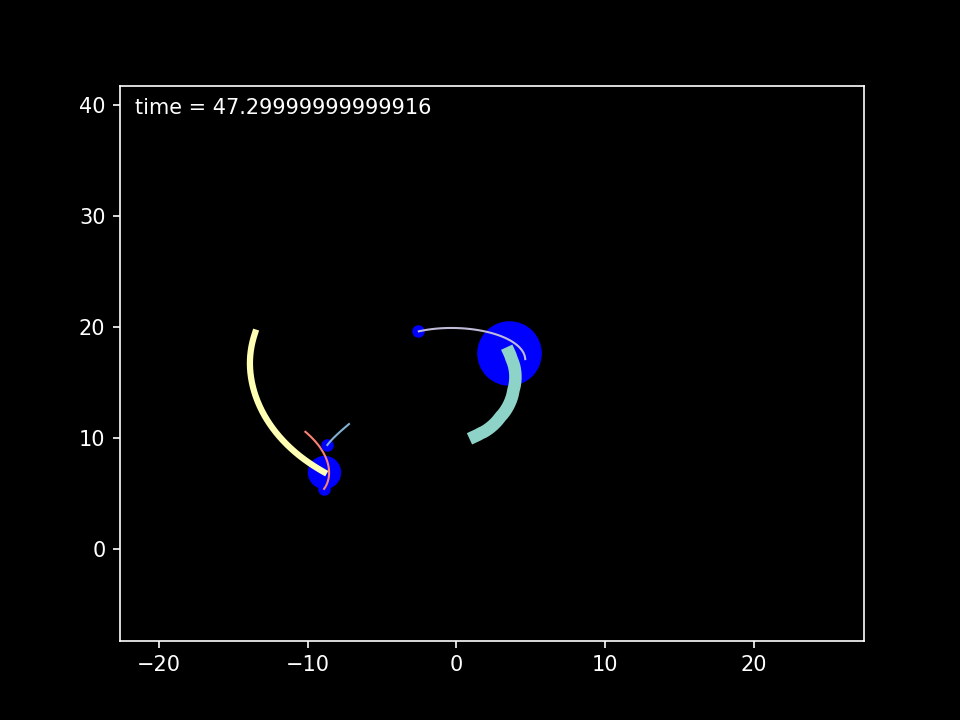

In [9]:
my_Sim_System.speed = 10
my_Sim_System.sim_name = "4_body_orbit_center_of_mass"
my_Sim_System.ShowAnimation(follow_mass = -1, size = 25)

<IPython.core.display.Javascript object>


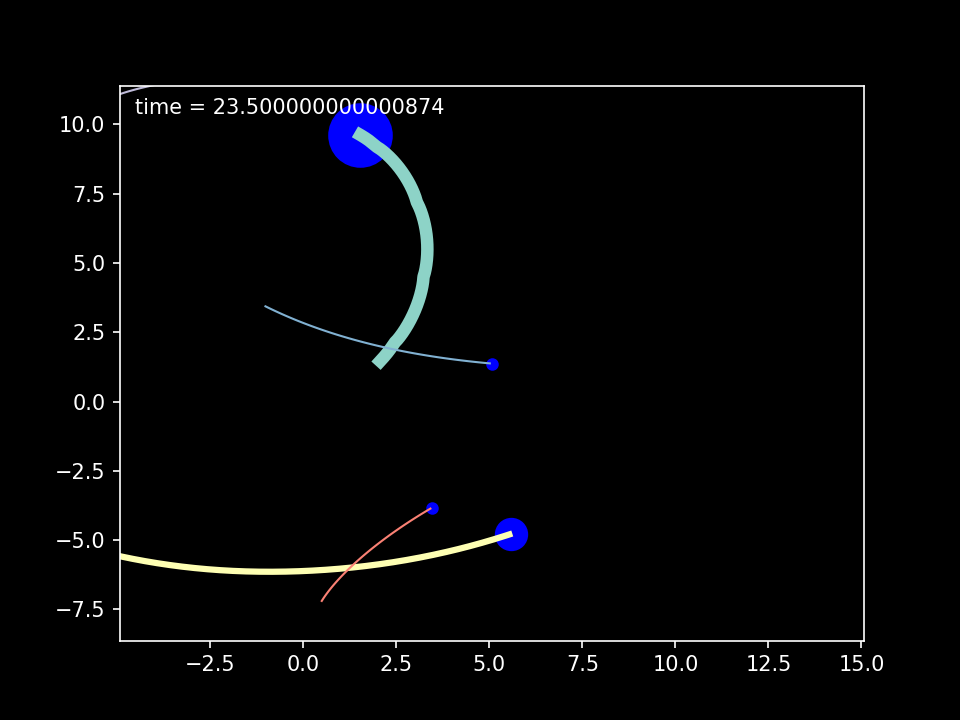

In [10]:
my_Sim_System.speed = 10
my_Sim_System.sim_name = "4_body_orbit_object_5"
my_Sim_System.ShowAnimation(follow_mass = 4, size = 10)

In [11]:
#8 body system
mass = [5]*8
q_0 = [[-10,10],[0,10],[10,10],[-10,0],[10,0],[-10,-10],[0,-10],[10,-10]]
p_0 = [[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]]
trace_len = [200]*8
size = [15]*8
my_Sim_8 = Simulation()
my_Sim_8.AddParts(mass, q_0, p_0, trace_len, size)
my_Sim_8.CalcPath(25)

<IPython.core.display.Javascript object>


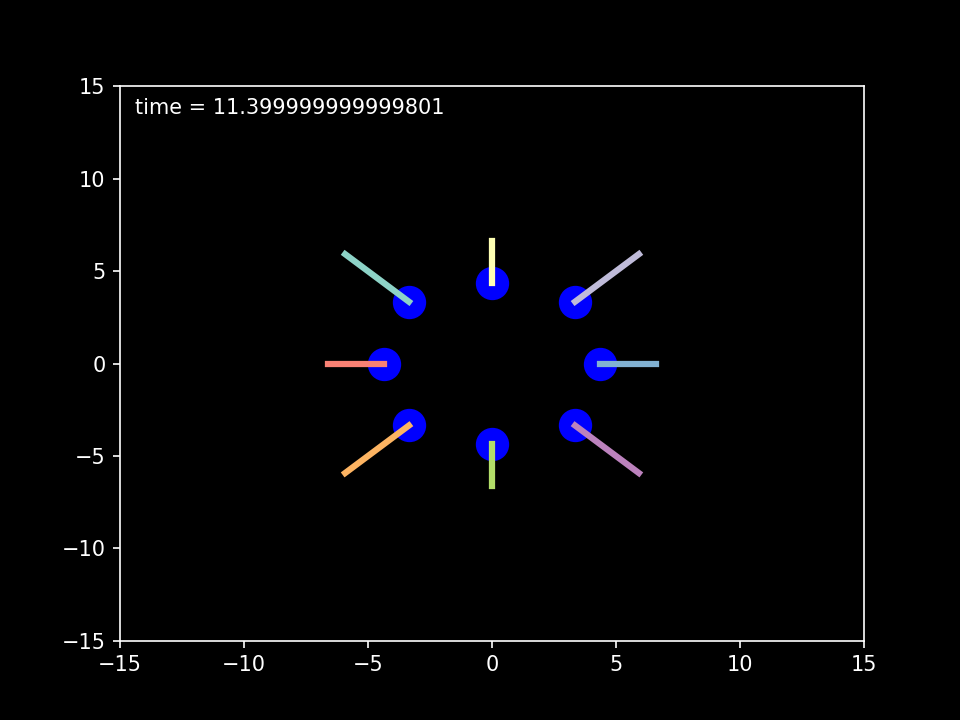

In [12]:
my_Sim_8.ShowAnimation()

In [13]:
#4 body system
mass = [15]*4
q_0 = [[-10,10],[10,10],[10,-10],[-10,-10]]
p_0 = [[3,3],[3,-3],[-3,-3],[-3,3]]
trace_len = [200]*4
size = [15]*4
my_Sim_4_Orbit = Simulation()
my_Sim_4_Orbit.AddParts(mass, q_0, p_0, trace_len, size)
my_Sim_4_Orbit.CalcPath(180)

<IPython.core.display.Javascript object>


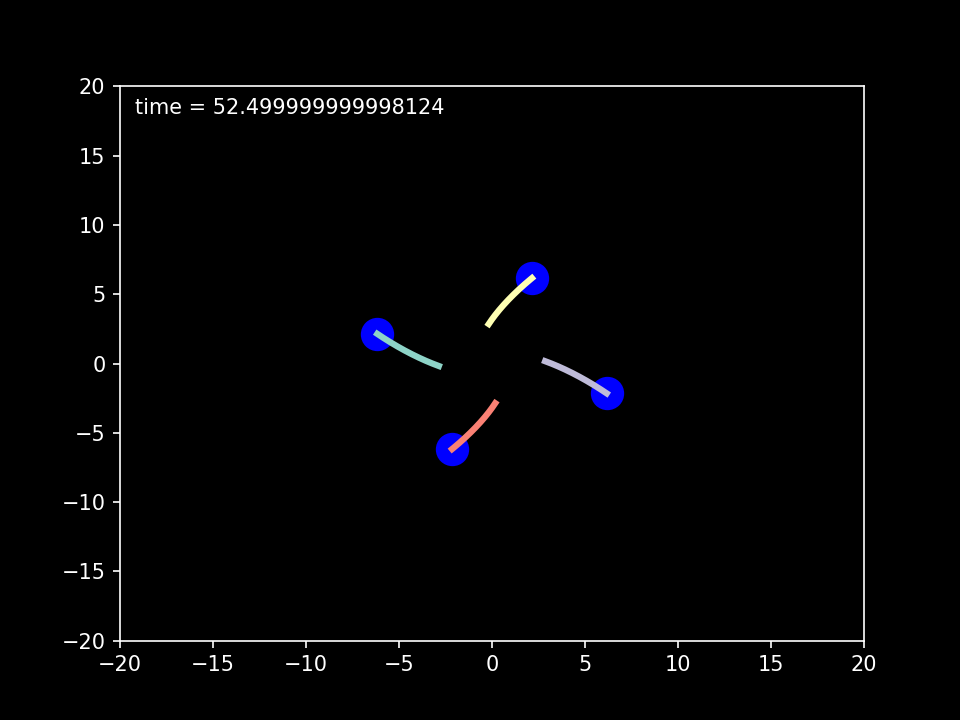

In [14]:
my_Sim_4_Orbit.speed = 30
my_Sim_4_Orbit.sim_name = "4_body_spiral"
my_Sim_4_Orbit.ShowAnimation(size = 20)

In [15]:
#8 body system
mass = [5]*8
a = 3*(2)**0.5
q_0 = [[-10,10],[0,10],[10,10],[-10,0],[10,0],[-10,-10],[0,-10],[10,-10]]
p_0 = [[3,3],[a,0],[3,-3],[0,a],[0,-a],[-3,3],[-a,0],[-3,-3]]
trace_len = [200]*8
size = [15]*8
my_Sim_8_Spiral = Simulation()
my_Sim_8_Spiral.AddParts(mass, q_0, p_0, trace_len, size)
my_Sim_8_Spiral.CalcPath(100)


#8 body system
mass = [5]*8
a = 3*(2)**0.5
b = 10*(2)**0.5
q_0 = [[-10,10],[0,b],[10,10],[-b,0],[b,0],[-10,-10],[0,-b],[10,-10]]
p_0 = [[3,3],[a,0],[3,-3],[0,a],[0,-a],[-3,3],[-a,0],[-3,-3]]
trace_len = [200]*8
size = [15]*8
my_Sim_8_Spiral2 = Simulation()
my_Sim_8_Spiral2.AddParts(mass, q_0, p_0, trace_len, size)
my_Sim_8_Spiral2.CalcPath(100)

<IPython.core.display.Javascript object>


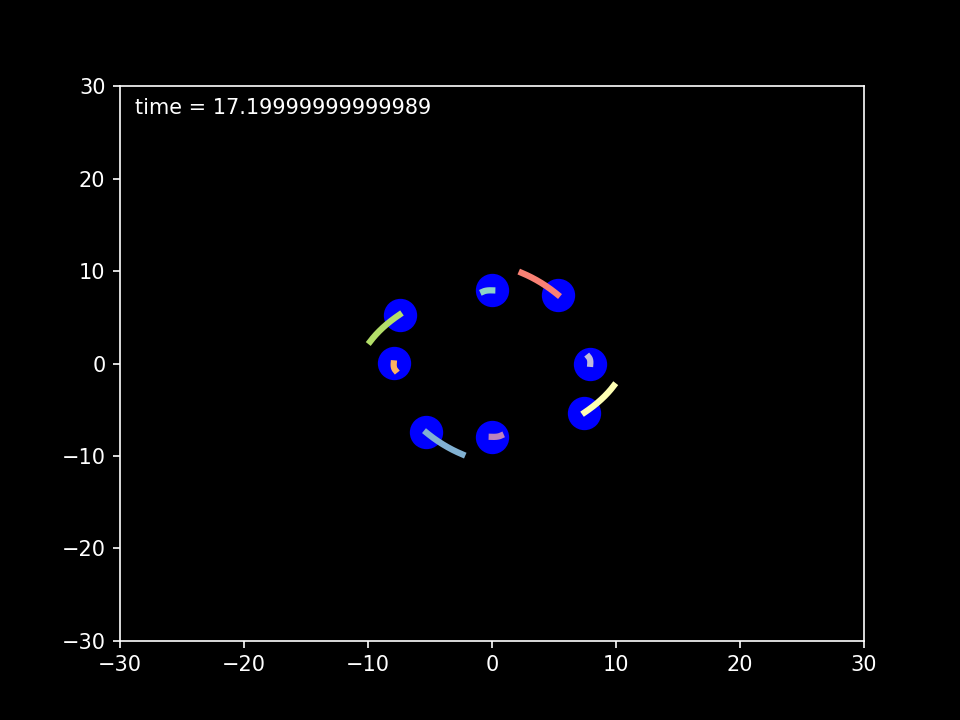

In [16]:
my_Sim_8_Spiral.sim_name = "8_body_spiral"
my_Sim_8_Spiral.ShowAnimation(size = 30)

<IPython.core.display.Javascript object>


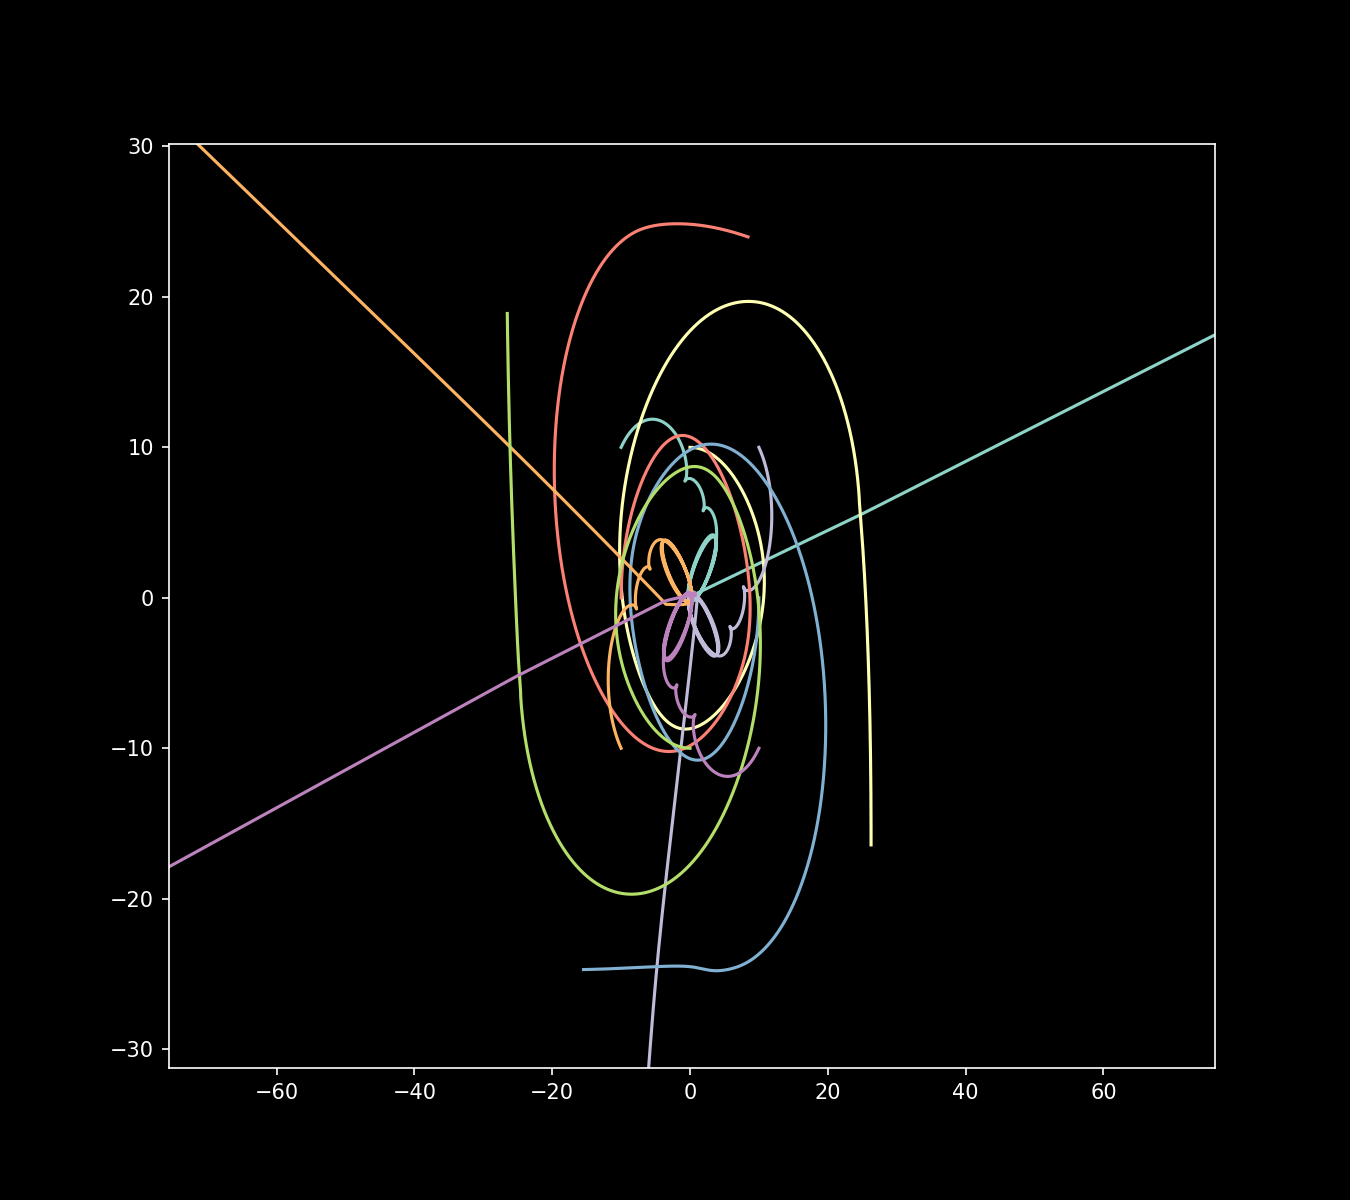

In [17]:
my_Sim_8_Spiral.ShowStatic()

<IPython.core.display.Javascript object>


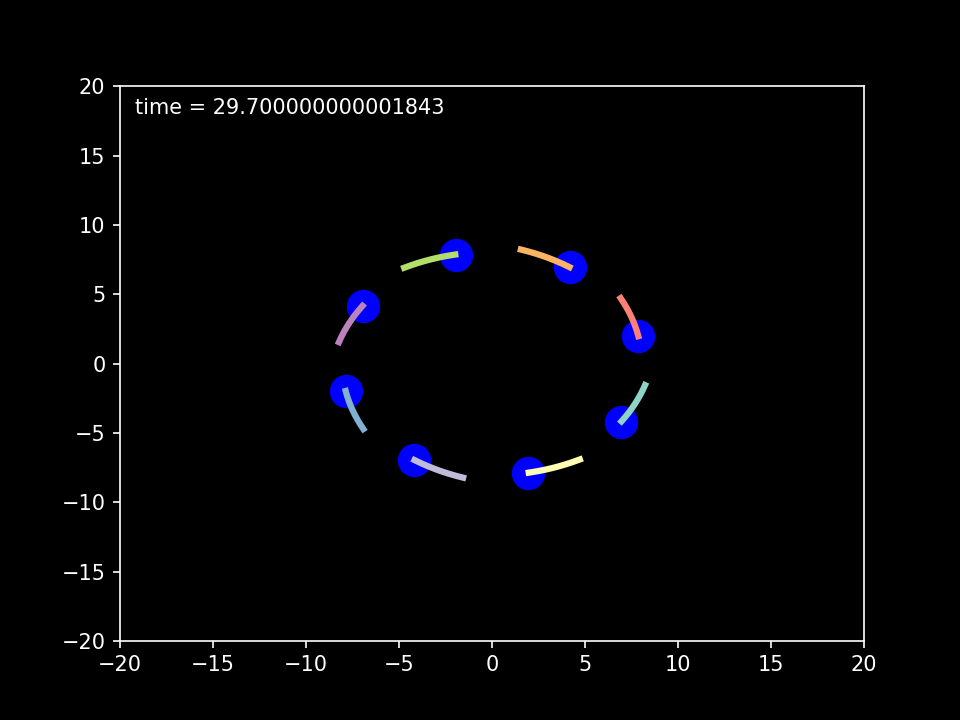

In [18]:
my_Sim_8_Spiral2.sim_name = "8_body_circle"
my_Sim_8_Spiral2.ShowAnimation(size = 20)

<IPython.core.display.Javascript object>


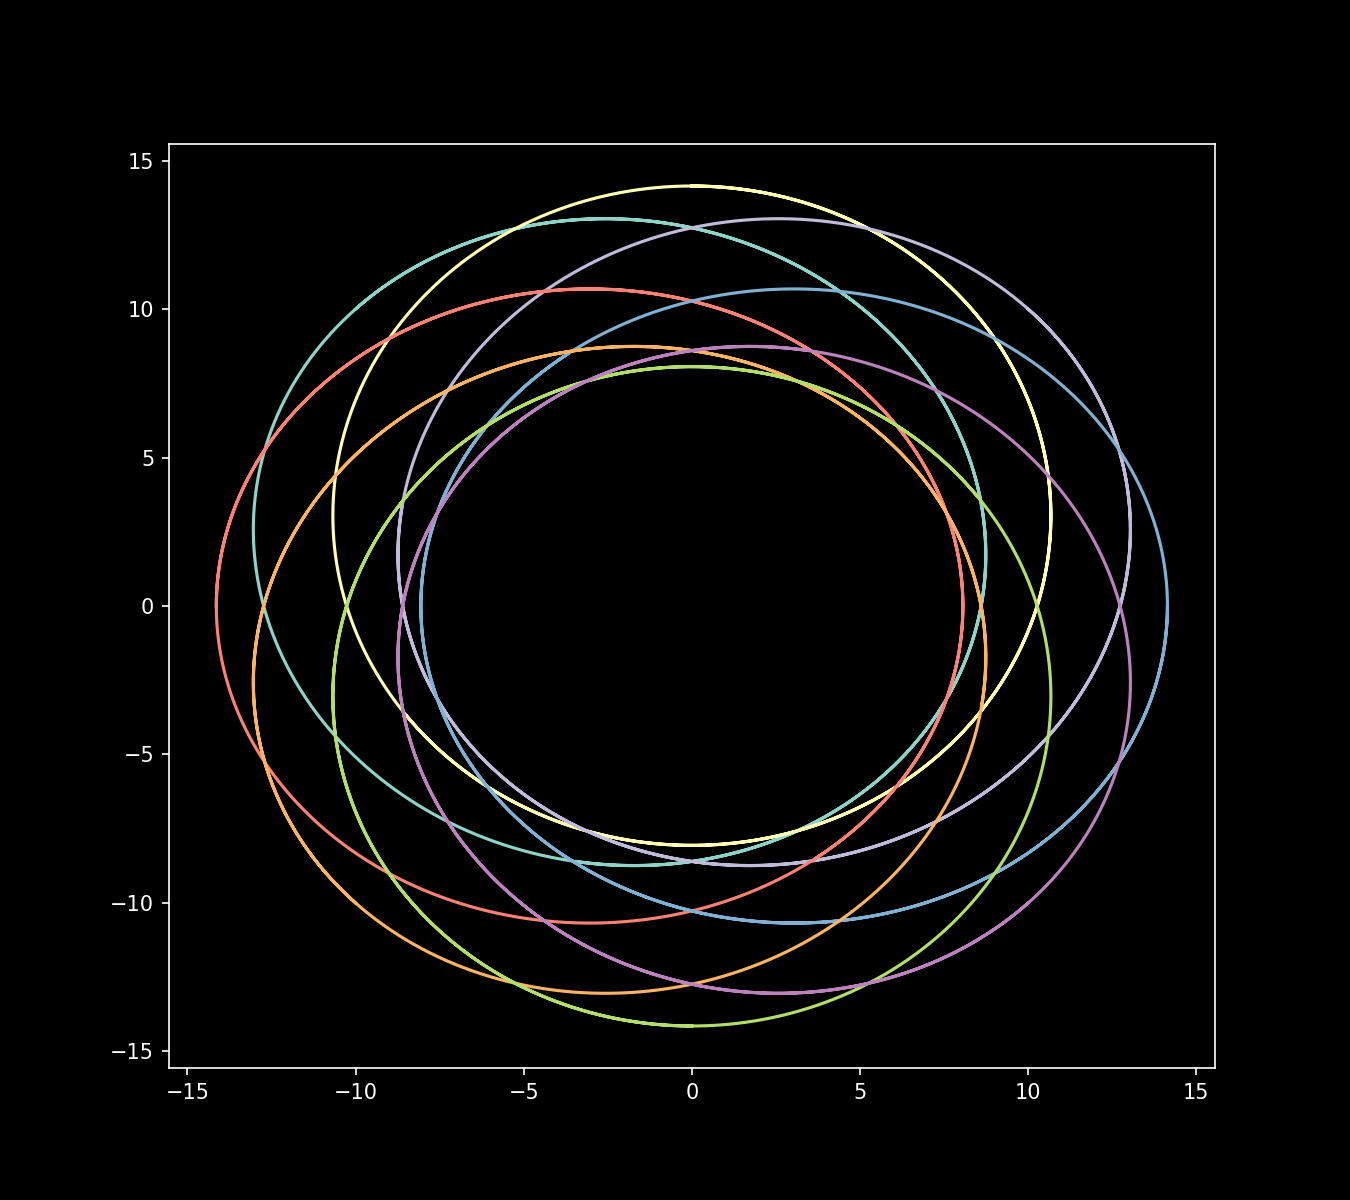

In [19]:
my_Sim_8_Spiral2.ShowStatic()